# Modules for Import

In [1]:
import pandas as pd

# !pip install pandasai
# !pip install langchain_community
# !pip install langchain_openai

import os
from pandasai import Agent
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.helpers.openai_info import get_openai_callback
import logging
import openai

from langchain_openai.chat_models import ChatOpenAI

# Create a custom logging configuration
logging.basicConfig(level=logging.CRITICAL)

# Read NBA Stats Data CSV from disk 

In [2]:
# Load your data into a pandas DataFrame
df = pd.read_csv('nba-stats-data.csv', low_memory=False)
# set season (year) as main DF index to allow for time series analysis of player data
df = df.reset_index().set_index('season')
df.index = pd.to_datetime(df.index, format='%Y').to_period('Y')
df = df.sort_index(axis=0)
df.head()

,index,assists,blocks,comment,defReb,fga,fgm,fgp,fta,ftm,...,DOB,age,feet,meters,position,active,jersey_number,years_pro,rookie_year,pounds
season,,,,,,,,,,,,,,,,,,,,,
2015,34,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,35,0.0,1.0,NaN,1.0,3.0,2.0,66.7,2.0,1.0,...,1991-07-01,33.0,"6""10",2.08,F-C,True,33.0,8.0,2013.0,240.0
2015,36,2.0,0.0,NaN,7.0,7.0,3.0,42.9,2.0,2.0,...,1988-07-16,36.0,"6""7",2.01,F,True,1.0,9.0,2012.0,237.0
2015,37,0.0,0.0,NaN,3.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,38,1.0,1.0,NaN,5.0,5.0,3.0,60.0,6.0,2.0,...,1992-03-22,33.0,"7""3",2.21,C,False,40.0,1.0,2015.0,265.0


# Analysis: Speak to the Data!

In [3]:
df.columns

Index(['index', 'assists', 'blocks', 'comment', 'defReb', 'fga', 'fgm', 'fgp',
       'fta', 'ftm', 'ftp', 'min', 'offReb', 'pFouls', 'plusMinus', 'points',
       'pos', 'steals', 'totReb', 'tpa', 'tpm', 'tpp', 'turnovers',
       'player_id', 'player_name', 'team_code', 'team_name', 'team_id',
       'game_id', 'affiliation', 'college', 'firstname', 'id', 'lastname',
       'country', 'DOB', 'age', 'feet', 'meters', 'position', 'active',
       'jersey_number', 'years_pro', 'rookie_year', 'pounds'],
      dtype='object')

## Set Open AI API Key

In [4]:
os.environ["OPENAI_API_KEY"] = "*******"

llm = OpenAI(model="gpt-3.5-turbo", openai_api_key=openai.api_key)

# Set Large Language Model & other DF confirgurations

In [5]:
df_nba = SmartDataframe(df, config={"llm": llm, "conversational": True, "verbose": True})

In [6]:
df_nba.chat("Which are the top 20 player_names by assists?")

,player_name,assists
1669,Russell Westbrook,13532.0
1214,Kyle Lowry,9276.0
596,Eric Bledsoe,7404.0
846,James Harden,6952.0
1220,Kyrie Irving,6658.0
1167,Kevin Durant,6590.0
517,Domantas Sabonis,6318.0
1356,Mason Plumlee,6225.0
978,John Wall,6204.0
316,Chris Paul,6116.0


# Chat with (query data)

In [7]:
df_nba.chat("Which are the top 10 player_names by assists?")

,player_name,assists
season,,
2017,Rajon Rondo,25.0
2018,Russell Westbrook,24.0
2018,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2020,Russell Westbrook,24.0
2023,Tyrese Haliburton,23.0
2016,Russell Westbrook,22.0
2016,Russell Westbrook,22.0
2024,Trae Young,22.0


In [8]:
df_nba.chat("Which are the top 5 player_names group by points?")

,points
player_name,
Kevin Durant,35170.0
Russell Westbrook,33398.0
Kyrie Irving,29574.0
Andre Drummond,27846.0
Nikola Vucevic,27172.0


In [9]:
df_nba.chat("Which are the top 5 player_names group by blocks?")

,blocks
player_name,
JaVale McGee,2648.0
Andre Drummond,2478.0
Mason Plumlee,1866.0
Kevin Durant,1640.0
Rudy Gobert,1586.0


In [10]:
df_nba.chat("Which are the top 5 player_names group by assists?")

,assists
player_name,
Russell Westbrook,13532.0
Kyle Lowry,9276.0
Eric Bledsoe,7404.0
James Harden,6952.0
Kyrie Irving,6658.0


In [11]:
df_nba.chat("Which are the top 5 distinct player_names by pounds?")

,player_name,pounds
season,,
2015,Jusuf Nurkic,290.0
2015,Boban Marjanovic,290.0
2019,Zion Williamson,284.0
2015,Nikola Jokic,284.0
2015,Joel Embiid,280.0


In [12]:
df_nba.chat("Which are the top 5 distinct player_names by meters?")

,Player Name
0,Mike Muscala
1,Mike Scott
2,Edy Tavares
3,Lamar Patterson
4,Thabo Sefolosha


In [13]:
df_nba.chat("Which are the top 5 player_names group by plusMinus?")

,player_name,plusMinus
0,Kevin Durant,8420.0
1,Stephen Curry,5453.0
2,Kyrie Irving,5234.0
3,Danny Green,5004.0
4,Kyle Lowry,4852.0


In [14]:
df_nba.chat("Which are the top 5 player_names by all stats excluding pFouls and turnovers?")

<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,0
player_name,
Norman Powell,7.296182e+08
Alec Burks,5.164466e+08
JaVale McGee,5.113462e+08
Pascal Siakam,5.029502e+08
Evan Fournier,5.015208e+08


In [15]:
df_nba.chat("Which are the best players by single game stats?")

,player_name,points,assists,blocks,defReb,fgm,ftm,steals
season,,,,,,,,
2023,Luka Doncic,73.0,7.0,0.0,10.0,25.0,15.0,1.0
2022,Donovan Mitchell,71.0,11.0,1.0,5.0,22.0,20.0,0.0
2022,Damian Lillard,71.0,6.0,0.0,5.0,22.0,14.0,0.0
2016,Devin Booker,70.0,6.0,1.0,6.0,21.0,24.0,3.0
2023,Joel Embiid,70.0,5.0,1.0,9.0,24.0,21.0,1.0


In [16]:
df_nba.chat("Plot points scored by LeBron James showing for each season, using different colors for each bar")

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 174, in execute_code
    exec(code, environment)
  File "<string>"

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'cm' is not allowed in RestrictedMatplotlib\n"

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


'/Users/conorheffron/workspace/data-science-in-python/assignment-1/submission/v2/exports/charts/temp_chart.png'

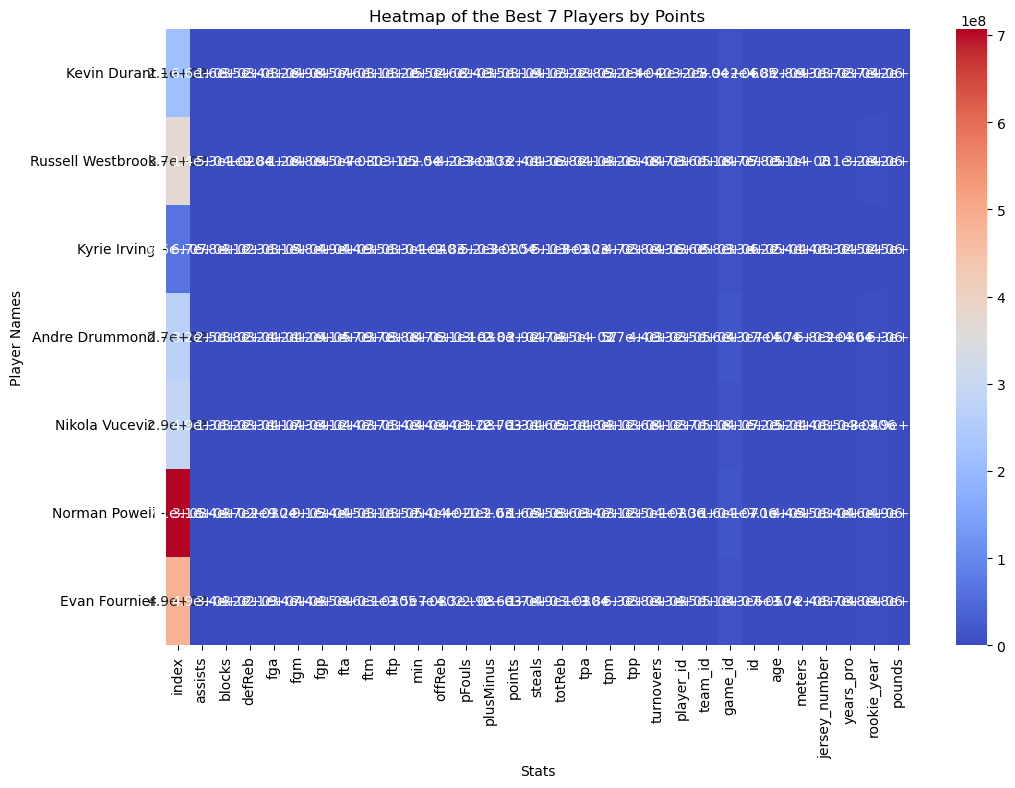

In [17]:
df_nba.chat("Plot heatmap of the best 7 player_names")